C:\Users\vedee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vedee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vedee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vedee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

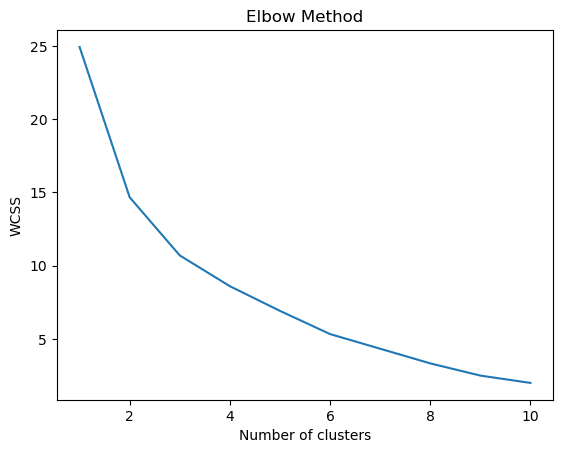

C:\Users\vedee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


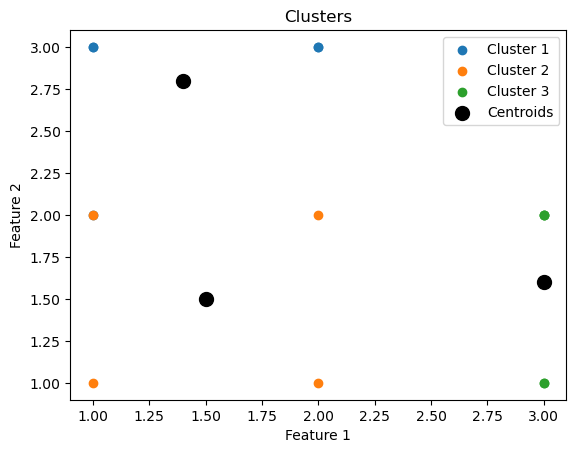

    age  income  student  credit-rating  buyspc  Cluster
0     1       3        0              1       0        0
1     1       3        0              2       0        0
2     2       3        0              1       1        0
3     3       2        0              1       1        2
4     3       1        1              1       1        2
5     3       1        1              2       0        2
6     2       1        1              2       1        1
7     1       2        0              1       0        0
8     1       1        1              1       0        1
9     3       2        1              1       1        2
10    1       2        1              2       1        1
11    2       2        0              2       1        1
12    2       3        1              1       1        0
13    3       2        0              2       0        2


In [2]:
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the ARFF data
data = arff.loadarff("D:\IT\DMLAB\student.arff")  # Replace "student.arff" with the actual file path
df = pd.DataFrame(data[0])

# Convert categorical attributes to numerical values
df['age'] = df['age'].map({b'<30': 1, b'30-40': 2, b'>40': 3})
df['income'] = df['income'].map({b'low': 1, b'medium': 2, b'high': 3})
df['student'] = df['student'].map({b'no': 0, b'yes': 1})
df['credit-rating'] = df['credit-rating'].map({b'fair': 1, b'excellent': 2})
df['buyspc'] = df['buyspc'].map({b'no': 0, b'yes': 1})

# Select the features for clustering
X = df.iloc[:, :-1].values

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

# Based on the Elbow method, choose the optimal number of clusters (e.g., 3)
optimal_num_clusters = 3

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_clusters = kmeans.fit_predict(X)

# Add the cluster labels to the Data799999999999yFrame
df['Cluster'] = pred_clusters

# Visualize the clusters (for 2D data)
feature1_index = 0
feature2_index = 1

for cluster_num in range(optimal_num_clusters):
    plt.scatter(X[pred_clusters == cluster_num, feature1_index], X[pred_clusters == cluster_num, feature2_index], label=f'Cluster {cluster_num + 1}')

plt.scatter(kmeans.cluster_centers_[:, feature1_index], kmeans.cluster_centers_[:, feature2_index], s=100, c='black', label='Centroids')
plt.title('Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Print the results
print(df)